In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
IMAGE_SIZE = [224, 224]

train_path = r'C:\Users\TARIQ KHAN\Desktop\Datasets\cottondisease_data\train'
valid_path = r'C:\Users\TARIQ KHAN\Desktop\Datasets\cottondisease_data\val'


In [3]:
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in resnet152V2.layers:
    layer.trainable = False

In [5]:
folders = glob(r'C:\Users\TARIQ KHAN\Desktop\Datasets\cottondisease_data\train\*')

In [6]:
folders

['C:\\Users\\TARIQ KHAN\\Desktop\\Datasets\\cottondisease_data\\train\\diseased cotton leaf',
 'C:\\Users\\TARIQ KHAN\\Desktop\\Datasets\\cottondisease_data\\train\\diseased cotton plant',
 'C:\\Users\\TARIQ KHAN\\Desktop\\Datasets\\cottondisease_data\\train\\fresh cotton leaf',
 'C:\\Users\\TARIQ KHAN\\Desktop\\Datasets\\cottondisease_data\\train\\fresh cotton plant']

In [7]:
x = Flatten()(resnet152V2.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

conv4_block33_preact_relu (Acti (None, 14, 14, 1024) 0           conv4_block33_preact_bn[0][0]    
__________________________________________________________________________________________________
conv4_block33_1_conv (Conv2D)   (None, 14, 14, 256)  262144      conv4_block33_preact_relu[0][0]  
__________________________________________________________________________________________________
conv4_block33_1_bn (BatchNormal (None, 14, 14, 256)  1024        conv4_block33_1_conv[0][0]       
__________________________________________________________________________________________________
conv4_block33_1_relu (Activatio (None, 14, 14, 256)  0           conv4_block33_1_bn[0][0]         
__________________________________________________________________________________________________
conv4_block33_2_pad (ZeroPaddin (None, 16, 16, 256)  0           conv4_block33_1_relu[0][0]       
__________________________________________________________________________________________________
conv4_bloc

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory(r'C:\Users\TARIQ KHAN\Desktop\Datasets\cottondisease_data\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 1951 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory(r'C:\Users\TARIQ KHAN\Desktop\Datasets\cottondisease_data\val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 324 images belonging to 4 classes.


In [19]:
test_set2= test_datagen.flow_from_directory(r'C:\Users\TARIQ KHAN\Desktop\Datasets\cottondisease_data\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [15]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\TARIQ KHAN\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
61/61 [==============================] - 55s 697ms/step - loss: 2.4786 - accuracy: 0.7018 - val_loss: 0.7208 - val_accuracy: 0.9074
Epoch 2/10
61/61 [==============================] - 38s 625ms/step - loss: 0.4742 - accuracy: 0.9270 - val_loss: 0.6757 - val_accuracy: 0.9198
Epoch 3/10
61/61 [==============================] - 39s 631ms/step - loss: 0.4808 - accuracy: 0.9388 - val_loss: 0.7589 - val_accuracy: 0.8920
Epoch 4/10
61/61 [==============================] - 39s 635ms/step - loss: 0.3034 - accuracy: 0.9543 - val_loss: 0.1640 - val_accuracy: 0.9691
Epoch 5/10
61/61 [==============================] - 40s 649ms/step - loss: 0.3351 - accuracy: 0.9526 - val_loss: 0.4364 - val_accuracy: 0.9506
Epoch 6/10
61/61 [==============================] - 42s 683ms/step - loss: 0.3015 - accuracy: 0.9677 - val_loss: 0.5500 - val_accuracy: 0.9352
Epoch 7/10
61/61 [==============================] - 43s 697ms/step - loss: 0.2219 - accuracy: 0.9704 - val_loss: 0.3792 - val_accuracy: 0.9475

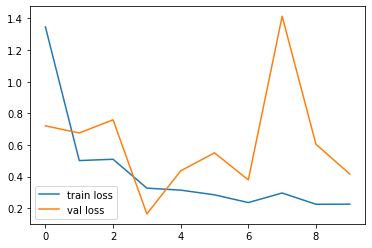

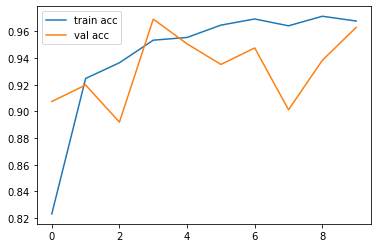

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [17]:
from tensorflow.keras.models import load_model

model.save('model_resnet152V2.h5')

In [20]:
y_pred = model.predict(test_set2)
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([2, 2, 2, 3, 1, 1, 1, 1, 0, 0, 1, 3, 0, 3, 3, 2, 2, 3], dtype=int64)